# 1. Thuật toán K-Means

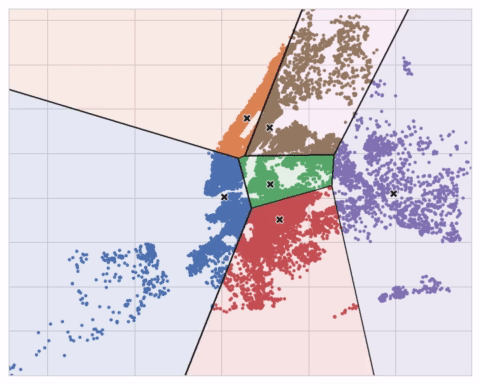

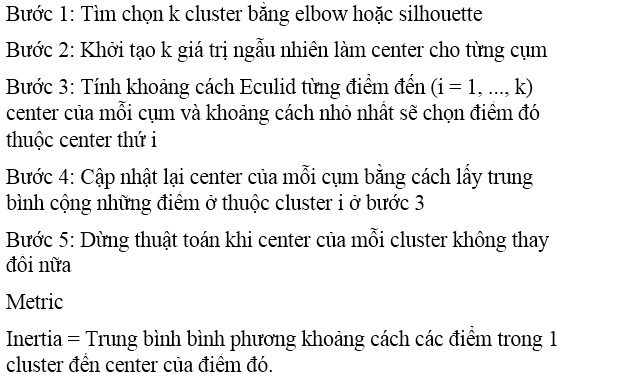

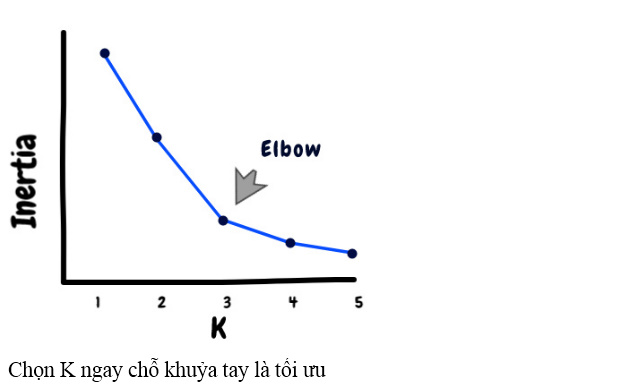

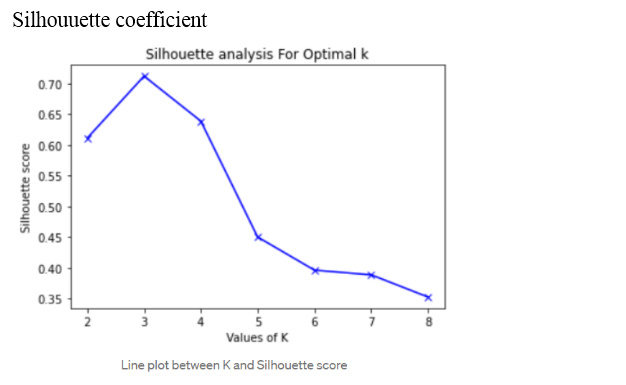

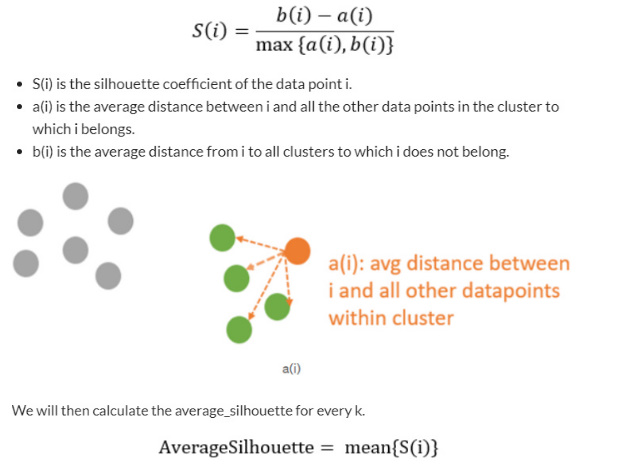

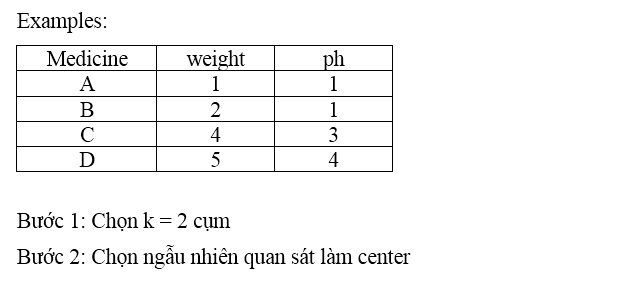

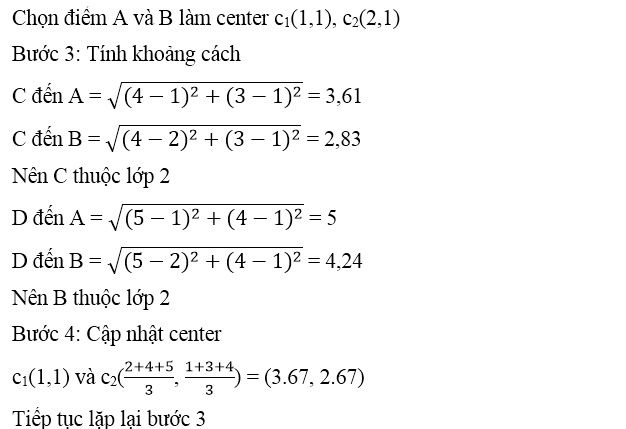

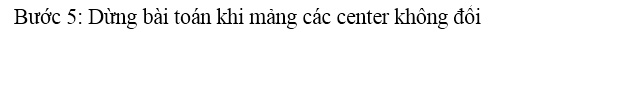

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 200
X0 = np.random.multivariate_normal(means[0], cov, N)#R^200x2

X1 = np.random.multivariate_normal(means[1], cov, N)#R^200x2
X2 = np.random.multivariate_normal(means[2], cov, N)#R^200x2

X = np.concatenate((X0, X1, X2), axis = 0)#R^600x2
K = 3
#R^600x2, 200 số 0 đầu, 200 số 1 giữa, 200 số 2 cuối
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

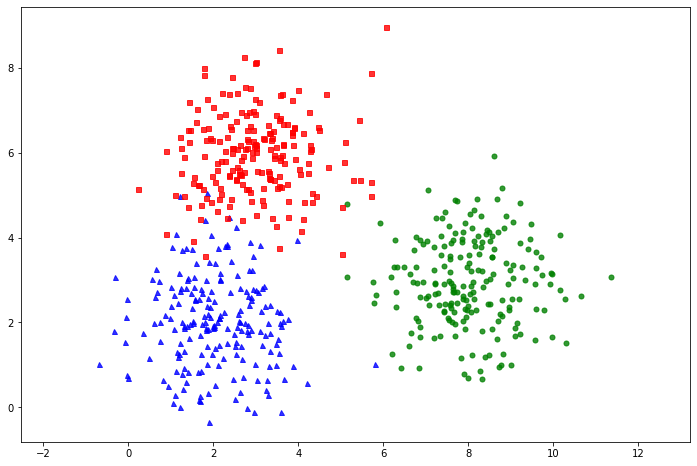

In [8]:
def kmeans_display(X, label):
    K = np.amax(label) + 1 #K=3
    X0 = X[label == 0, :] #Tách X0 từ X,R^500x2
    X1 = X[label == 1, :] #Tách X1 từ X,R^500x2
    X2 = X[label == 2, :] #Tách X2 từ X,R^500x2
    plt.figure(figsize=(12,8))
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 5, alpha = 0.8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 5, alpha = 0.8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 5, alpha = 0.8)
    plt.axis('equal')
    plt.show()
    
kmeans_display(X, original_label)

In [9]:
def kmeans_init_centers(X, k):
    #Lấy ngẫu nhiên 3 giá trị từ 0 đến 600
    #X lấy ngẫu nhiên 3 hàng R^3x2
    return X[np.random.choice(X.shape[0], k, replace=False)]
#Hàm mất mát là giá trị khoảng cách
def kmeans_assign_labels(X, centers):
    #Tính khoảng cách điểm đến center
    D = cdist(X, centers) 
    #Trả về giá trị index có khoảng cách nhỏ nhất
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    #Tạo ma trận 0 R^3x2
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # Gom tất cả các điểm thuộc 1 label lại Xk rồi tính mean Xk
        # Xk R^200x2
        Xk = X[labels == k, :]
        #Tính toán centers lại của mỗi cụm lúc này số lượng  mỗi cụm có thể không bằng 200
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):# Điều kiện dừng bài toán
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

In [10]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0 
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

Centers found by our algorithm:
[[2.97915774 5.93316015]
 [1.99635388 1.96712286]
 [8.01494777 2.93955549]]
5


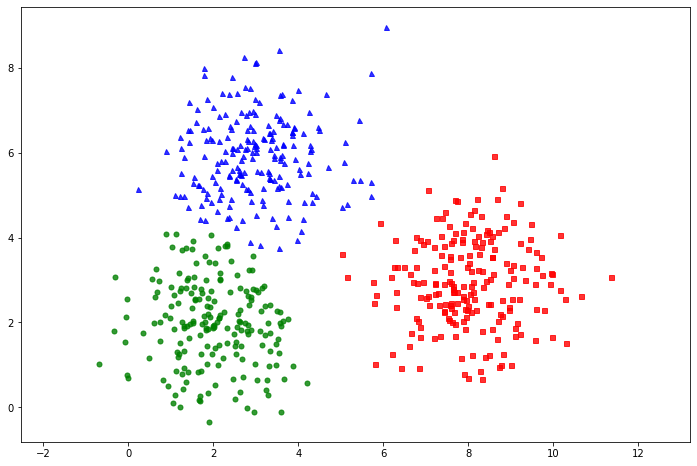

In [11]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])
print(it)
kmeans_display(X, labels[-1])


Centers found by scikit-learn:
[[1.99635388 1.96712286]
 [8.01494777 2.93955549]
 [2.97915774 5.93316015]]


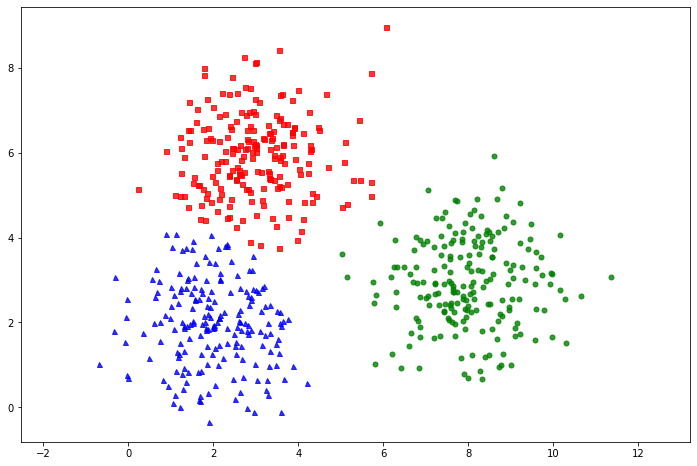

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
#Nhãn dự đoán từng điểm R^1500x1
pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)